In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# About Dataset
### Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

| Attribute                     | Description                                                                                  |
|-------------------------------|----------------------------------------------------------------------------------------------|
| Hours_Studied                 | Number of hours spent studying per week.                                                    |
| Attendance                     | Percentage of classes attended.                                                              |
| Parental_Involvement           | Level of parental involvement in the student's education (Low, Medium, High).               |
| Access_to_Resources            | Availability of educational resources (Low, Medium, High).                                  |
| Extracurricular_Activities     | Participation in extracurricular activities (Yes, No).                                      |
| Sleep_Hours                   | Average number of hours of sleep per night.                                                 |
| Previous_Scores               | Scores from previous exams.                                                                  |
| Motivation_Level              | Student's level of motivation (Low, Medium, High).                                          |
| Internet_Access               | Availability of internet access (Yes, No).                                                  |
| Tutoring_Sessions             | Number of tutoring sessions attended per month.                                             |
| Family_Income                 | Family income level (Low, Medium, High).                                                    |
| Teacher_Quality               | Quality of the teachers (Low, Medium, High).                                               |
| School_Type                   | Type of school attended (Public, Private).                                                  |
| Peer_Influence                | Influence of peers on academic performance (Positive, Neutral, Negative).                   |
| Physical_Activity             | Average number of hours of physical activity per week.                                      |
| Learning_Disabilities          | Presence of learning disabilities (Yes, No).                                               |
| Parental_Education_Level      | Highest education level of parents (High School, College, Postgraduate).                    |
| Distance_from_Home            | Distance from home to school (Near, Moderate, Far).                                        |
| Gender                         | Gender of the student (Male, Female).                                                      |
| Exam_Score                    | Final exam score.                                                                           |


# Loading Data

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(6378, 20)

In [265]:
# mode_pel = df['Parental_Education_Level'].mode()[0]
# df['Parental_Education_Level'].fillna(mode_pel, inplace=True)

# mode_tq = df['Teacher_Quality'].mode()[0]
# df['Teacher_Quality'].fillna(mode_tq, inplace=True)

# mode_dfh = df['Distance_from_Home'].mode()[0]
# df['Distance_from_Home'].fillna(mode_dfh, inplace=True)

In [6]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


## Univariate Analysis

In [12]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/211.8 kB ? eta -:--:--
   - -----------------------------


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   - -------------------------------------- 0.1/2.2 MB 41.0 kB/s eta 0:00:53
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 42.3 kB/s eta 0:00:51
   - -------------------------------------- 0.1/2.2 MB 49.4 kB/s eta 0:00:43
   - -------------------------------------- 0.1/2.2 MB 49.4 kB/s eta 0:00:43
   - -------------------------------------- 0.1/2.2 MB 49.4 kB/s eta 0:00:43
   -- ------------------------------------- 0.1/2.2 MB 57.5 kB/s eta 0:00:37
   -- ------------------------------------- 0.1/2.2 MB 57.5 kB/s eta 0:00:37
   -- ------------------------------------- 0.1/2.2 MB 57.5 kB/s eta 0:00:3

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Hours_Studied', ylabel='Count'>

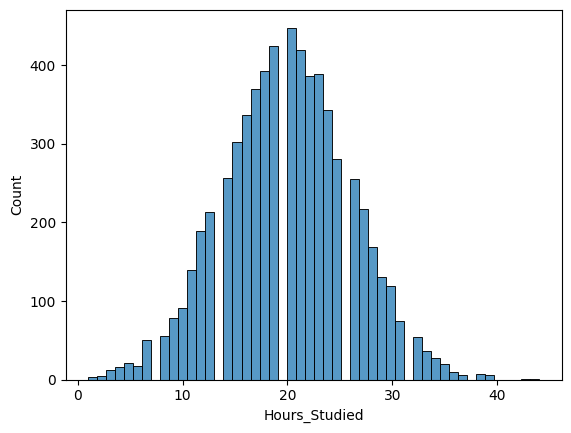

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Hours_Studied'])

<Axes: ylabel='count'>

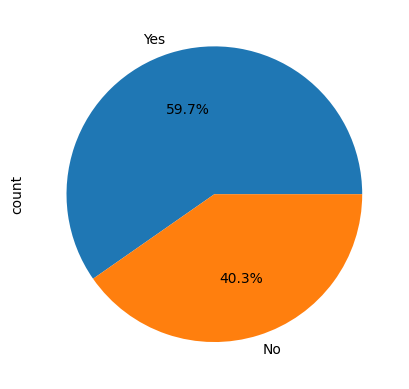

In [14]:
df.Extracurricular_Activities.value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

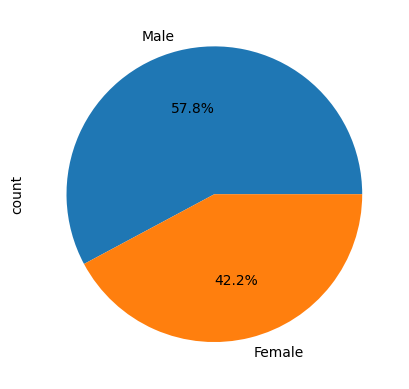

In [15]:
df['Gender'].value_counts().plot(kind='pie', autopct="%1.1f%%")

## Bivariate Analysis

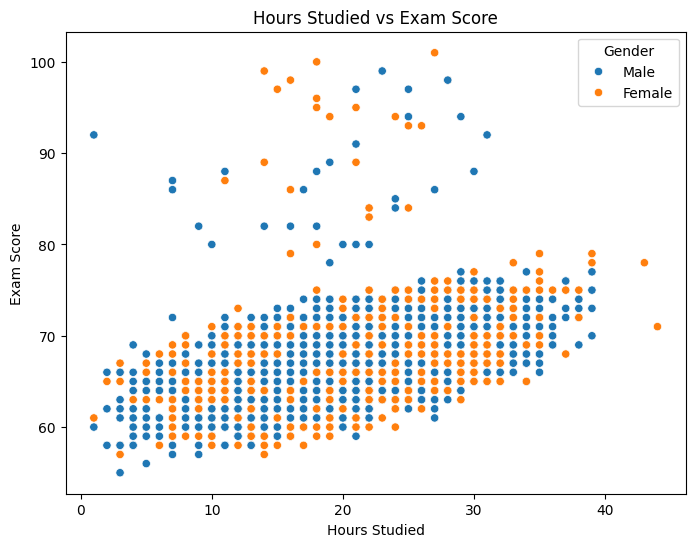

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score',hue ='Gender')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

<Axes: xlabel='Gender', ylabel='Hours_Studied'>

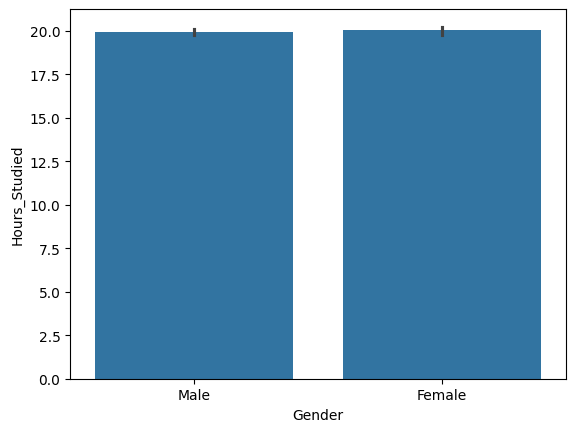

In [17]:
sns.barplot(y=df['Hours_Studied'], x=df['Gender'])

Text(0.5, 1.0, 'Attendance vs Exam Score')

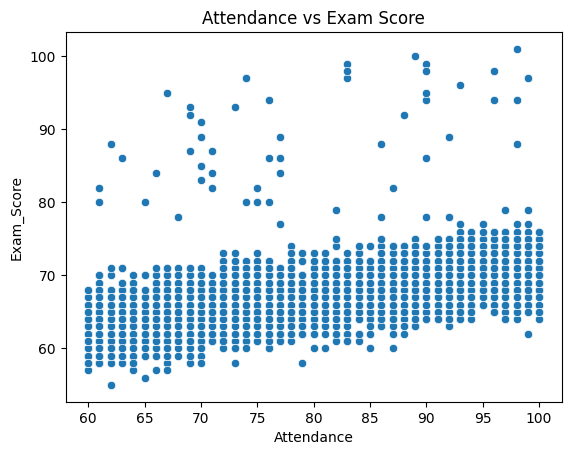

In [18]:
sns.scatterplot(data=df, x="Attendance", y="Exam_Score")
plt.title("Attendance vs Exam Score")

<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>

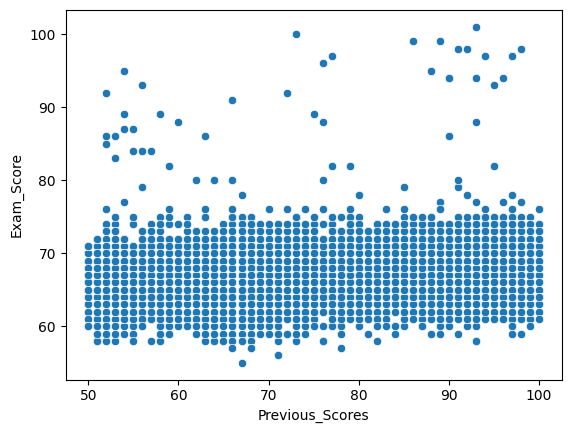

In [19]:
sns.scatterplot(data=df, x="Previous_Scores", y="Exam_Score")

<Axes: xlabel='Extracurricular_Activities'>

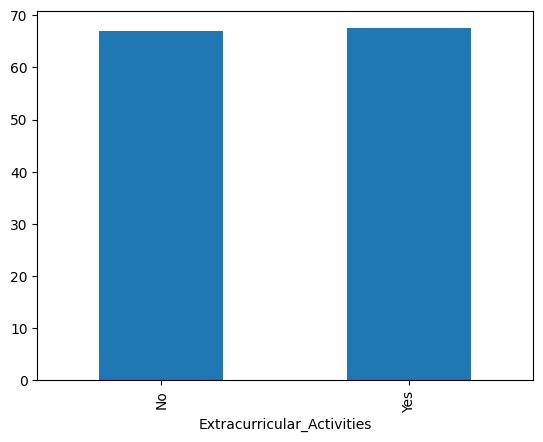

In [20]:
df.groupby("Extracurricular_Activities")['Exam_Score'].mean().plot(kind='bar')

<Axes: xlabel='Parental_Education_Level'>

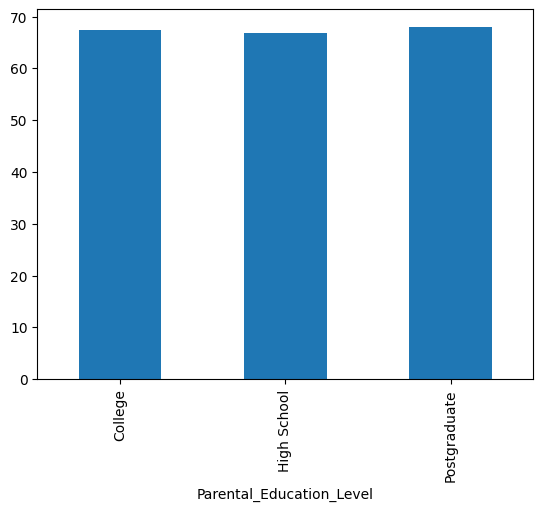

In [21]:
df.groupby("Parental_Education_Level")['Exam_Score'].mean().plot(kind='bar')

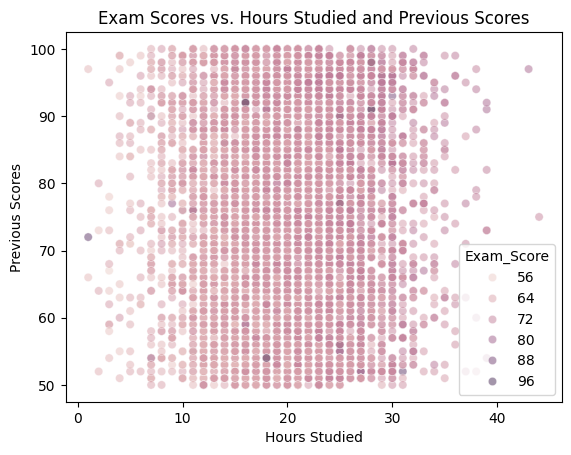

In [22]:
sns.scatterplot(data=df, x='Hours_Studied', y='Previous_Scores', hue='Exam_Score', alpha=0.5)

plt.title('Exam Scores vs. Hours Studied and Previous Scores')

plt.xlabel('Hours Studied')

plt.ylabel('Previous Scores')

plt.show()

<Axes: xlabel='Learning_Disabilities', ylabel='Exam_Score'>

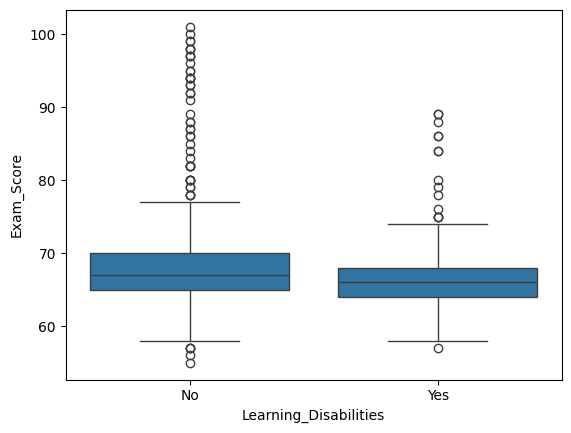

In [23]:
sns.boxplot(data=df, x="Learning_Disabilities", y="Exam_Score")

<Axes: xlabel='Exam_Score', ylabel='Count'>

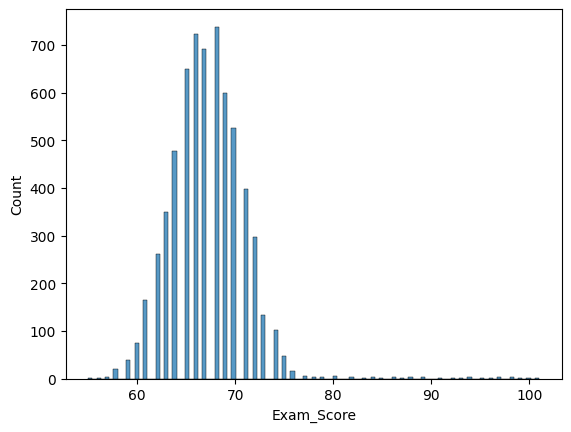

In [24]:
sns.histplot(data=df, x='Exam_Score')

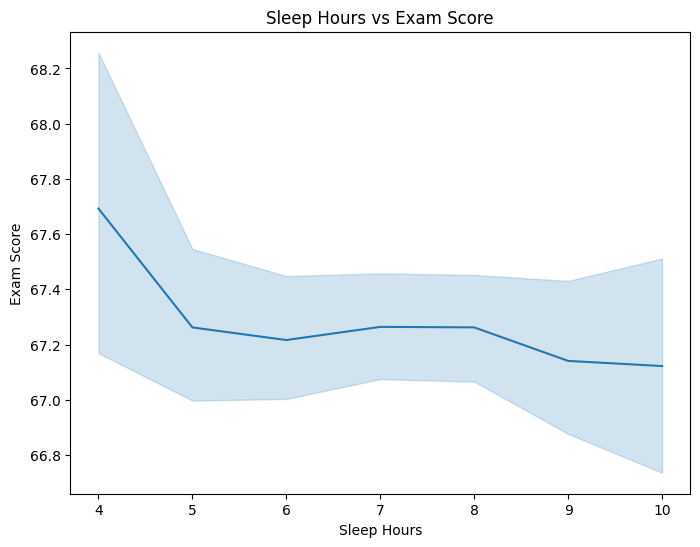

In [25]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Sleep_Hours', y='Exam_Score')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


In [26]:
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.274721
Male      67.235629
Name: Exam_Score, dtype: float64

In [27]:
df['Gender'].value_counts()

Gender
Male      3688
Female    2690
Name: count, dtype: int64

In [29]:
df.Exam_Score.describe()

count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

# Removing Outliers

In [30]:
numeric_cols = df.select_dtypes(include=[np.number])

z_threshold = 3

z_scores = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())

df_no_outliers = df[(z_scores < z_threshold).all(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")

Original DataFrame shape: (6378, 20)
DataFrame shape after outlier removal: (6280, 20)


# Feature Encoding

In [31]:
universal_mapping = {}
df_encoded = df_no_outliers.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    unique_values = df_encoded[column].unique()

    mapping = {value: i for i, value in enumerate(unique_values)}

    df_encoded[column] = df_encoded[column].map(mapping)
    universal_mapping[column] = mapping


print(df_encoded.shape)

(6280, 20)


In [32]:
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0,0,0,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1,0,2,4,0,1,0,1,70


In [33]:
universal_mapping

{'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
 'Access_to_Resources': {'High': 0, 'Medium': 1, 'Low': 2},
 'Extracurricular_Activities': {'No': 0, 'Yes': 1},
 'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
 'Internet_Access': {'Yes': 0, 'No': 1},
 'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
 'Teacher_Quality': {'Medium': 0, 'High': 1, 'Low': 2},
 'School_Type': {'Public': 0, 'Private': 1},
 'Peer_Influence': {'Positive': 0, 'Negative': 1, 'Neutral': 2},
 'Learning_Disabilities': {'No': 0, 'Yes': 1},
 'Parental_Education_Level': {'High School': 0,
  'College': 1,
  'Postgraduate': 2},
 'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2},
 'Gender': {'Male': 0, 'Female': 1}}

In [34]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5024, 19)
(1256, 19)
(5024,)
(1256,)


# Building the Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"Linear Regression R^2 Score (without outliers) = {score}")

Linear Regression R^2 Score (without outliers) = 0.9744585282208477


# Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

MSE:  0.28194782368999716
MAE:  0.43061162525069197


# Prediction Pipeline

In [38]:
import pandas as pd

# Create a sample DataFrame with 3 observations
data = {
    'Hours_Studied': [5, 8, 3],
    'Attendance': [90, 85, 70],
    'Parental_Involvement': ['High', 'Medium', 'Low'],
    'Access_to_Resources': ['High', 'Medium', 'Low'],
    'Extracurricular_Activities': ['Yes', 'No', 'Yes'],
    'Sleep_Hours': [7, 6, 5],
    'Previous_Scores': [75, 88, 65],
    'Motivation_Level': ['High', 'Medium', 'Low'],
    'Internet_Access': ['Yes', 'No', 'Yes'],
    'Tutoring_Sessions': [2, 4, 1],
    'Family_Income': ['High', 'Medium', 'Low'],
    'Teacher_Quality': ['High', 'Medium', 'Low'],
    'School_Type': ['Public', 'Private', 'Public'],
    'Peer_Influence': ['Positive', 'Neutral', 'Negative'],
    'Physical_Activity': [3, 2, 4],
    'Learning_Disabilities': ['No', 'Yes', 'No'],
    'Parental_Education_Level': ['Postgraduate', 'College', 'High School'],
    'Distance_from_Home': ['Near', 'Far', 'Moderate'],
    'Gender': ['Male', 'Female', 'Male'],
}

# Convert the data into a DataFrame
sample_df = pd.DataFrame(data)

# Display the DataFrame
sample_df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,5,90,High,High,Yes,7,75,High,Yes,2,High,High,Public,Positive,3,No,Postgraduate,Near,Male
1,8,85,Medium,Medium,No,6,88,Medium,No,4,Medium,Medium,Private,Neutral,2,Yes,College,Far,Female
2,3,70,Low,Low,Yes,5,65,Low,Yes,1,Low,Low,Public,Negative,4,No,High School,Moderate,Male


In [42]:
def predict(input_df):
    for col in input_df.select_dtypes(include=['object']):
        input_df[col] = input_df[col].map(universal_mapping[col])
    
    return model.predict(input_df)

In [43]:
predict(sample_df)

array([69.38912677, 63.16636312, 56.18999931])

## Exporting the Model

In [41]:
import pickle

pickle.dump( model, open('model.pkl', 'wb'))
pickle.dump(universal_mapping, open('mapping.pkl', 'wb'))